In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
data = pd.read_csv("ADNIMERGE.csv")
data.columns

Index(['RID', 'PTID', 'VISCODE', 'SITE', 'COLPROT', 'ORIGPROT', 'EXAMDATE',
       'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT',
       'PTMARRY', 'APOE4', 'FDG', 'PIB', 'AV45', 'CDRSB', 'ADAS11', 'ADAS13',
       'MMSE', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting', 'FAQ', 'MOCA', 'EcogPtMem', 'EcogPtLang',
       'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt',
       'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan',
       'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'FLDSTRENG', 'FSVERSION',
       'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform',
       'MidTemp', 'ICV', 'DX', 'EXAMDATE_bl', 'CDRSB_bl', 'ADAS11_bl',
       'ADAS13_bl', 'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl',
       'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'FAQ_bl',
       'FLDSTRENG_bl', 'FSVERSION_bl', 'Ventricles_bl', 'Hippocampus_bl',
       'WholeBrain_bl', 'Entorhinal_bl

In [3]:
data.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,0.000000,0.00000,0,0,2017-08-13 23:50:48.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,0.000000,0.00000,0,0,2017-08-13 23:50:48.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,0.498289,5.96721,6,6,2017-08-13 23:50:48.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,0.999316,11.96720,12,12,2017-08-13 23:50:48.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,Male,...,NaN,NaN,1.09079,NaN,NaN,1.998630,23.93440,24,24,2017-08-13 23:50:48.0


In [32]:
print(data.isnull().any())

RID                      False
PTID                     False
VISCODE                  False
SITE                     False
COLPROT                  False
ORIGPROT                 False
EXAMDATE                 False
DX_bl                     True
AGE                      False
PTGENDER                 False
PTEDUCAT                 False
PTETHCAT                 False
PTRACCAT                 False
PTMARRY                  False
APOE4                     True
FDG                       True
PIB                       True
AV45                      True
CDRSB                     True
ADAS11                    True
ADAS13                    True
MMSE                      True
RAVLT_immediate           True
RAVLT_learning            True
RAVLT_forgetting          True
RAVLT_perc_forgetting     True
FAQ                       True
MOCA                      True
EcogPtMem                 True
EcogPtLang                True
                         ...  
Ventricles_bl             True
Hippocam

In [4]:
cols = ['PTID', 'RID', 'SITE', 'COLPROT', 'ORIGPROT', 'EXAMDATE',
       'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT',
       'PTMARRY', 'ADAS11','ADAS13','FAQ','MMSE','RAVLT_immediate',
       'RAVLT_learning','RAVLT_forgetting','RAVLT_perc_forgetting',
       'EXAMDATE_bl', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'MMSE_bl', 
       'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 
       'RAVLT_perc_forgetting_bl', 'Years_bl', 'Month_bl']
       #'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform',
       #'MidTemp', 'ICV']
subset = data[cols]
print(subset.shape)
subset.head()

(13017, 32)


,PTID,RID,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,...,CDRSB_bl,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,Years_bl,Month_bl
0,011_S_0002,2,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,16,...,0.0,10.67,18.67,28,44.0,4.0,6.0,54.5455,0.000000,0.00000
1,011_S_0003,3,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,18,...,4.5,22.00,31.00,20,22.0,1.0,4.0,100.0000,0.000000,0.00000
2,011_S_0003,3,11,ADNI1,ADNI1,2006-03-13,AD,81.3,Male,18,...,4.5,22.00,31.00,20,22.0,1.0,4.0,100.0000,0.498289,5.96721
3,011_S_0003,3,11,ADNI1,ADNI1,2006-09-12,AD,81.3,Male,18,...,4.5,22.00,31.00,20,22.0,1.0,4.0,100.0000,0.999316,11.96720
4,011_S_0003,3,11,ADNI1,ADNI1,2007-09-12,AD,81.3,Male,18,...,4.5,22.00,31.00,20,22.0,1.0,4.0,100.0000,1.998630,23.93440


In [5]:
# Removing null values
by_RID = subset.sort_values(["RID","EXAMDATE"])
by_RID = by_RID.reset_index(drop=True)
by_RID = by_RID.dropna()
print(by_RID.shape)

display(by_RID.head())

no_long = by_RID.groupby(by='RID').first()
no_long.shape

(8505, 32)


,PTID,RID,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,PTEDUCAT,...,CDRSB_bl,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,Years_bl,Month_bl
0,011_S_0002,2,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,16,...,0.0,10.67,18.67,28,44.0,4.0,6.0,54.5455,0.000000,0.00000
1,011_S_0002,2,11,ADNI1,ADNI1,2006-03-06,CN,74.3,Male,16,...,0.0,10.67,18.67,28,44.0,4.0,6.0,54.5455,0.490075,5.86885
2,011_S_0002,2,11,ADNI1,ADNI1,2008-08-27,CN,74.3,Male,16,...,0.0,10.67,18.67,28,44.0,4.0,6.0,54.5455,2.967830,35.54100
3,011_S_0002,2,11,ADNIGO,ADNI1,2010-09-22,CN,74.3,Male,16,...,0.0,10.67,18.67,28,44.0,4.0,6.0,54.5455,5.037650,60.32790
5,011_S_0002,2,11,ADNI2,ADNI1,2011-09-19,CN,74.3,Male,16,...,0.0,10.67,18.67,28,44.0,4.0,6.0,54.5455,6.028750,72.19670


(1710, 31)

In [6]:
date = by_RID.groupby(by='RID').agg(['mean', 'count'])
date.head()
# date.size()

SITE         AGE       PTEDUCAT           ADAS11           ADAS13        \
    mean count  mean count     mean count       mean count       mean count   
RID                                                                           
2     11     8  74.3     8       16     8  11.292500     8  19.292500     8   
3     11     4  81.3     4       18     4  22.667500     4  33.417500     4   
4     22     5  67.5     5       10     5  16.998000     5  24.398000     5   
5     11     4  73.7     4       16     4   8.335000     4  13.085000     4   
6    100     6  80.4     6       13     6  16.668333     6  24.668333     6   

     ...  RAVLT_learning_bl       RAVLT_forgetting_bl        \
     ...               mean count                mean count   
RID  ...                                                      
2    ...                4.0     8                 6.0     8   
3    ...                1.0     4                 4.0     4   
4    ...                7.0     5                 4.0     5   
5    ...                4.0     4                 4.0     4   
6    ...                1.0     6                 5.0     6   

    RAVLT_perc_forgetting_bl        Years_bl         Month_bl        
                        mean count      mean count       mean count  
RID                                                                  
2                    54.5455     8  4.951752     8  59.299219     8  
3                   100.0000     4  0.874059     4  10.467202     4  
4                    36.3636     5  1.206843     5  14.452460     5  
5                    44.4444     4  1.377139     4  16.491800     4  
6                    83.3333     6  1.316908     6  15.770482     6  

[5 rows x 42 columns]

In [7]:
#masks
ad = no_long[no_long['DX_bl'] == 'AD']
cn = no_long[no_long['DX_bl'] == 'CN']
emci = no_long[no_long['DX_bl'] == 'EMCI']
lmci = no_long[no_long['DX_bl'] == 'LMCI']
smc = no_long[no_long['DX_bl'] == 'SMC']

In [8]:
# cols = ['PTID', 'RID', 'SITE', 'COLPROT', 'ORIGPROT', 'EXAMDATE',
#        'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT',
#        'PTMARRY', 'ADAS11','ADAS13','FAQ','MMSE','RAVLT_immediate',
#        'RAVLT_learning','RAVLT_forgetting','RAVLT_perc_forgetting',
#        'EXAMDATE_bl', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'MMSE_bl', 
#        'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 
#        'RAVLT_perc_forgetting_bl', 'Years_bl', 'Month_bl']


# 1. Decline/Rise in cognitive scores over successive visits - increasing age effect also - 
# should match with months from baseline also
# 2. Age, married status stats
# 3. Ethnicity ratios/ place of testing
# 4. Percentage of foergetting/learning with age 
# 5. Correlate with FAQ and MMSE scores

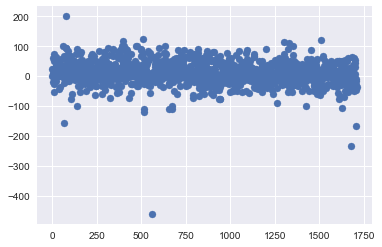

In [9]:
# 1.
res = by_RID.groupby(by='RID').last()['RAVLT_perc_forgetting']-by_RID.groupby(by='RID').first()['RAVLT_perc_forgetting']
plt.scatter(range(len(res)),res) # display(res[res<-100]) # display(by_RID[by_RID['RID']==1010])

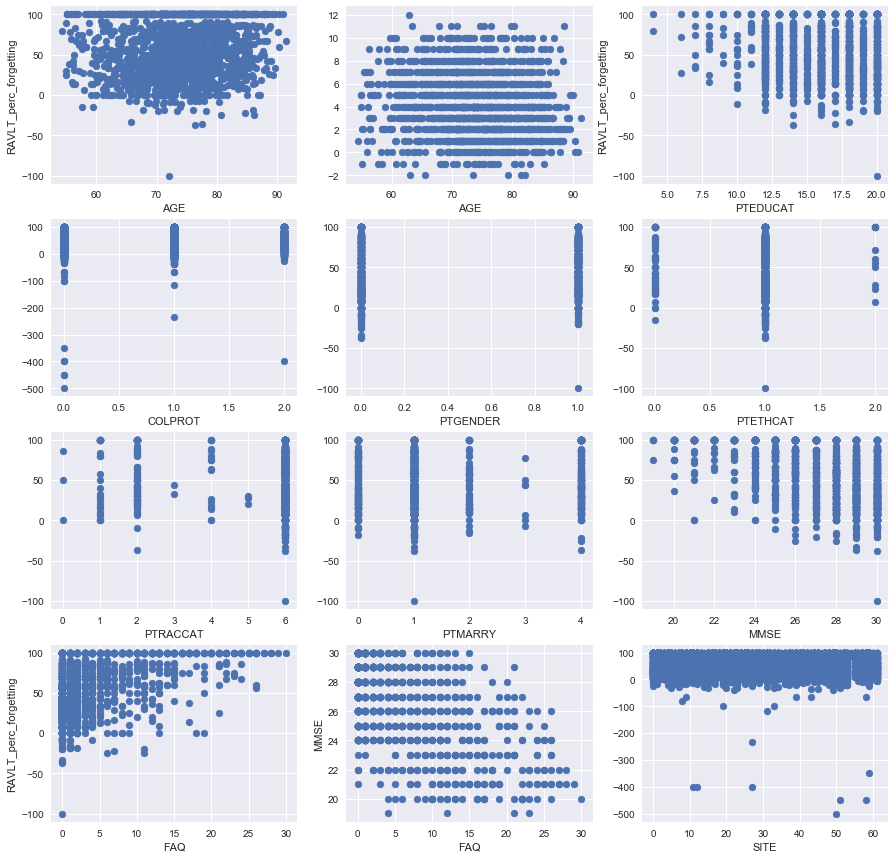

In [10]:
# 2. 
from sklearn import preprocessing
encode = preprocessing.LabelEncoder() 
df_enc = pd.DataFrame()
for column in ['COLPROT', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'PTMARRY']: 
    df_enc[column] = encode.fit_transform(no_long[column])


fig, ax = plt.subplots(4,3,figsize = (15,15))

ax[0,0].scatter(no_long['AGE'],no_long['RAVLT_perc_forgetting'])
ax[0,0].set_xlabel('AGE')
ax[0,0].set_ylabel('RAVLT_perc_forgetting')

ax[0,1].scatter(no_long['AGE'],no_long['RAVLT_learning'])
ax[0,1].set_xlabel('AGE')

ax[0,2].scatter(no_long['PTEDUCAT'],no_long['RAVLT_perc_forgetting'])
ax[0,2].set_xlabel('PTEDUCAT')
ax[0,2].set_ylabel('RAVLT_perc_forgetting')

ax[1,0].scatter(encode.fit_transform(by_RID['COLPROT']),by_RID['RAVLT_perc_forgetting'])
ax[1,0].set_xlabel('COLPROT')

ax[1,1].scatter(df_enc['PTGENDER'],no_long['RAVLT_perc_forgetting'])
ax[1,1].set_xlabel('PTGENDER')

ax[1,2].scatter(df_enc['PTETHCAT'],no_long['RAVLT_perc_forgetting'])
ax[1,2].set_xlabel('PTETHCAT')

ax[2,0].scatter(df_enc['PTRACCAT'],no_long['RAVLT_perc_forgetting'])
ax[2,0].set_xlabel('PTRACCAT')

ax[2,1].scatter(df_enc['PTMARRY'],no_long['RAVLT_perc_forgetting'])
ax[2,1].set_xlabel('PTMARRY')

ax[2,2].scatter(no_long['MMSE'],no_long['RAVLT_perc_forgetting'])
ax[2,2].set_xlabel('MMSE')

ax[3,0].scatter(no_long['FAQ'],no_long['RAVLT_perc_forgetting'])
ax[3,0].set_xlabel('FAQ')
ax[3,0].set_ylabel('RAVLT_perc_forgetting')

ax[3,1].scatter(no_long['FAQ'],no_long['MMSE'])
ax[3,1].set_xlabel('FAQ')
ax[3,1].set_ylabel('MMSE')

ax[3,2].scatter(encode.fit_transform(by_RID['SITE']),by_RID['RAVLT_perc_forgetting'])
ax[3,2].set_xlabel('SITE')

# ax[3,2].scatter(encode.fit_transform(by_RID['SITE']),by_RID['RAVLT_perc_forgetting'])
# ax[3,2].set_xlabel('SITE')


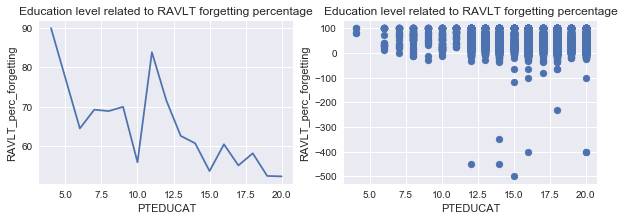

In [11]:
df = by_RID[['PTEDUCAT', 'RAVLT_perc_forgetting']].groupby(by='PTEDUCAT').agg(['mean'])
x = by_RID['PTEDUCAT'].unique()
x.sort()
y = df.get_values()[:,0]

fig, ax = plt.subplots(1,2,figsize = (10,3))

ax[0].plot(x,y)
ax[0].set_xlabel('PTEDUCAT')
ax[0].set_ylabel('RAVLT_perc_forgetting')
ax[0].set_title('Education level related to RAVLT forgetting percentage')
# ax[0].savefig('Figs/Edu_vs_Ravlt')

ax[1].scatter(by_RID['PTEDUCAT'], by_RID['RAVLT_perc_forgetting'])
ax[1].set_xlabel('PTEDUCAT')
ax[1].set_ylabel('RAVLT_perc_forgetting')
ax[1].set_title('Education level related to RAVLT forgetting percentage')


fig.savefig('Figs/Edu_vs_Ravlt')

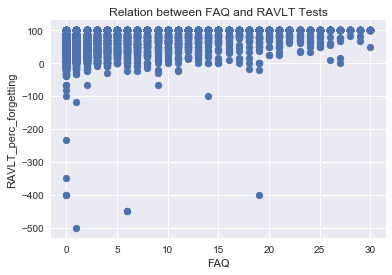

In [12]:
plt.scatter(by_RID['FAQ'],by_RID['RAVLT_perc_forgetting'])
plt.xlabel('FAQ')
plt.ylabel('RAVLT_perc_forgetting')
plt.title('Relation between FAQ and RAVLT Tests')
plt.savefig('Figs/FAQ_vs_Ravlt')

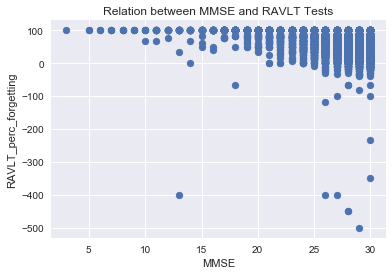

In [13]:
plt.scatter(by_RID['MMSE'],by_RID['RAVLT_perc_forgetting'])
plt.xlabel('MMSE')
plt.ylabel('RAVLT_perc_forgetting')
plt.title('Relation between MMSE and RAVLT Tests')
plt.savefig('Figs/MMSE_vs_Ravlt')

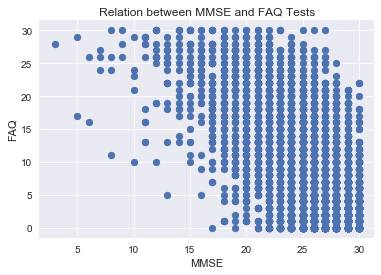

In [14]:
plt.scatter(by_RID['MMSE'],by_RID['FAQ'])
plt.xlabel('MMSE')
plt.ylabel('FAQ')
plt.title('Relation between MMSE and FAQ Tests')
plt.savefig('Figs/MMSE_vs_FAQ')

KeyError: 'Ventricles'

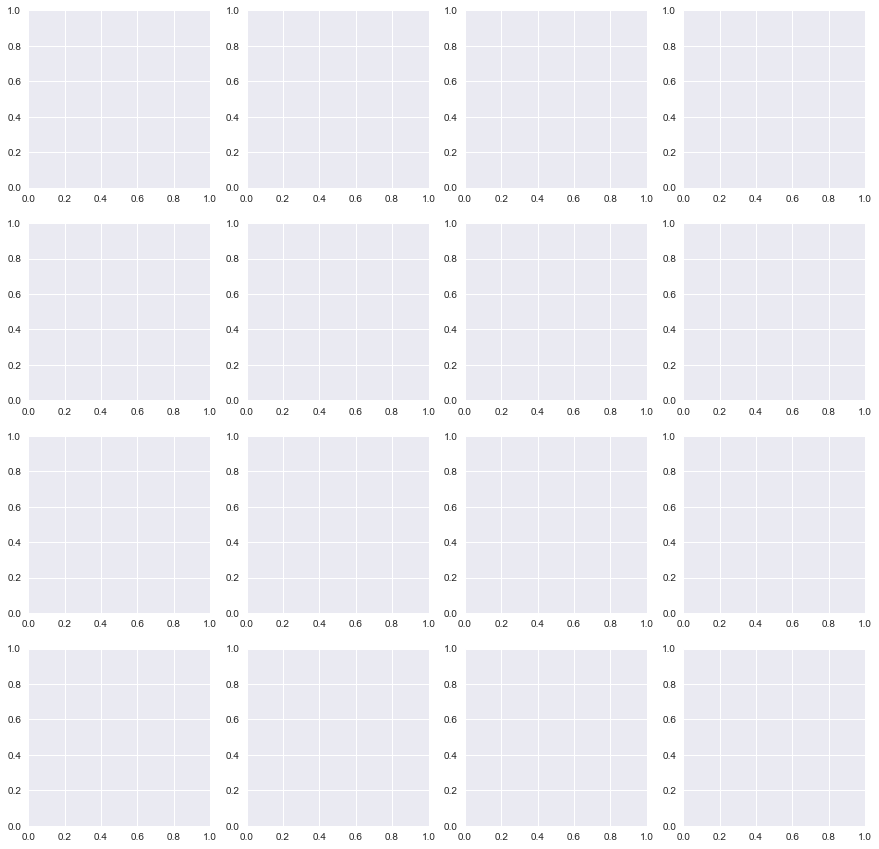

In [15]:
fig, ax = plt.subplots(4,4,figsize = (15,15))


ax[0,0].scatter(by_RID['Ventricles'],by_RID['RAVLT_perc_forgetting'])
ax[0,0].set_xlabel('Ventricles')
ax[0,0].set_ylabel('RAVLT_perc_forgetting')

ax[0,1].scatter(by_RID['Hippocampus'],by_RID['RAVLT_perc_forgetting'])
ax[0,1].set_xlabel('Hippocampus')
ax[0,1].set_ylabel('RAVLT_perc_forgetting')

ax[0,2].scatter(by_RID['WholeBrain'],by_RID['RAVLT_perc_forgetting'])
ax[0,2].set_xlabel('WholeBrain')
ax[0,2].set_ylabel('RAVLT_perc_forgetting')

ax[0,3].scatter(by_RID['Entorhinal'],by_RID['RAVLT_perc_forgetting'])
ax[0,3].set_xlabel('Entorhinal')
ax[0,3].set_ylabel('RAVLT_perc_forgetting')

ax[1,0].scatter(by_RID['WholeBrain'],by_RID['RAVLT_perc_forgetting'])
ax[1,0].set_xlabel('WholeBrain')
ax[1,0].set_ylabel('RAVLT_perc_forgetting')

ax[1,1].scatter(by_RID['Fusiform'],by_RID['RAVLT_perc_forgetting'])
ax[1,1].set_xlabel('Fusiform')
ax[1,1].set_ylabel('RAVLT_perc_forgetting')

ax[1,2].scatter(by_RID['MidTemp'],by_RID['RAVLT_perc_forgetting'])
ax[1,2].set_xlabel('MidTemp')
ax[1,2].set_ylabel('RAVLT_perc_forgetting')

ax[1,3].scatter(by_RID['ICV'],by_RID['RAVLT_perc_forgetting'])
ax[1,3].set_xlabel('ICV')
ax[1,3].set_ylabel('RAVLT_perc_forgetting')




ax[2,0].scatter(by_RID['AGE'], by_RID['Ventricles'])
ax[2,0].set_ylabel('Ventricles')
ax[2,0].set_xlabel('AGE')

ax[2,1].scatter(by_RID['AGE'], by_RID['Hippocampus'])
ax[2,1].set_ylabel('Hippocampus')
ax[2,1].set_xlabel('AGE')

ax[2,2].scatter(by_RID['AGE'], by_RID['WholeBrain'])
ax[2,2].set_ylabel('WholeBrain')
ax[2,2].set_xlabel('AGE')

ax[2,3].scatter(by_RID['AGE'], by_RID['Entorhinal'])
ax[2,3].set_ylabel('Entorhinal')
ax[2,3].set_xlabel('AGE')

ax[3,0].scatter(by_RID['AGE'], by_RID['WholeBrain'])
ax[3,0].set_ylabel('WholeBrain')
ax[3,0].set_xlabel('AGE')

ax[3,1].scatter(by_RID['AGE'], by_RID['Fusiform'])
ax[3,1].set_ylabel('Fusiform')
ax[3,1].set_xlabel('AGE')

ax[3,2].scatter(by_RID['AGE'], by_RID['MidTemp'])
ax[3,2].set_ylabel('MidTemp')
ax[3,2].set_xlabel('AGE')

ax[3,3].scatter(by_RID['AGE'], by_RID['ICV'])
ax[3,3].set_ylabel('ICV')
ax[3,3].set_xlabel('AGE')


In [ ]:
a = df2.get_values()
b = pd.DataFrame(a)
display(b.head())
s = b.sum(axis=1)

c=pd.DataFrame()
for col in b.columns:
    c[col] = b[col]/s

c.head()

In [ ]:
df2.columns

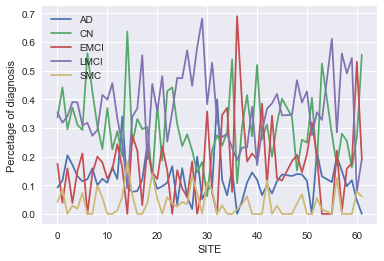

In [16]:

df = pd.get_dummies(by_RID[['DX_bl']])
df['SITE'] = by_RID['SITE']
# plt.scatter(df['DX'])
df2 = df.groupby(by=['SITE']).agg(['sum'])
x = encode.fit_transform(by_RID['SITE'].unique())
x.sort()
x = pd.DataFrame(x)

# display(c)
x=x.drop([46,54])

# Generating percentages
b = pd.DataFrame(df2.get_values())
s = b.sum(axis=1)

c=pd.DataFrame()
for col in b.columns:
    c[col] = b[col]/s
c=c.drop([46,54])
# df2 = df2.drop([46,54])
# c.head()

# plt.plot(x, df2['DX_bl_AD'], label='AD')
# plt.plot(x, df2['DX_bl_CN'], label='CN')
# plt.plot(x, df2['DX_bl_EMCI'], label='EMCI')
# plt.plot(x, df2['DX_bl_LMCI'], label='LMCI')
# plt.plot(x, df2['DX_bl_SMC'], label='SMC')
# plt.legend()
# plt.xlabel('SITE')
# plt.ylabel('Count of diagnosis')
# plt.show()



plt.plot(x, c[0], label='AD')
plt.plot(x, c[1], label='CN')
plt.plot(x, c[2], label='EMCI')
plt.plot(x, c[3], label='LMCI')
plt.plot(x, c[4], label='SMC')
plt.legend()
plt.xlabel('SITE')
plt.ylabel('Percetage of diagnosis')
plt.show()


# plt.scatter(encode.fit_transform(by_RID['SITE']),encode.fit_transform(by_RID['DX_bl']))
# plt.xlabel('SITE')
# plt.ylabel('DX_bl')

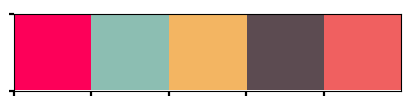

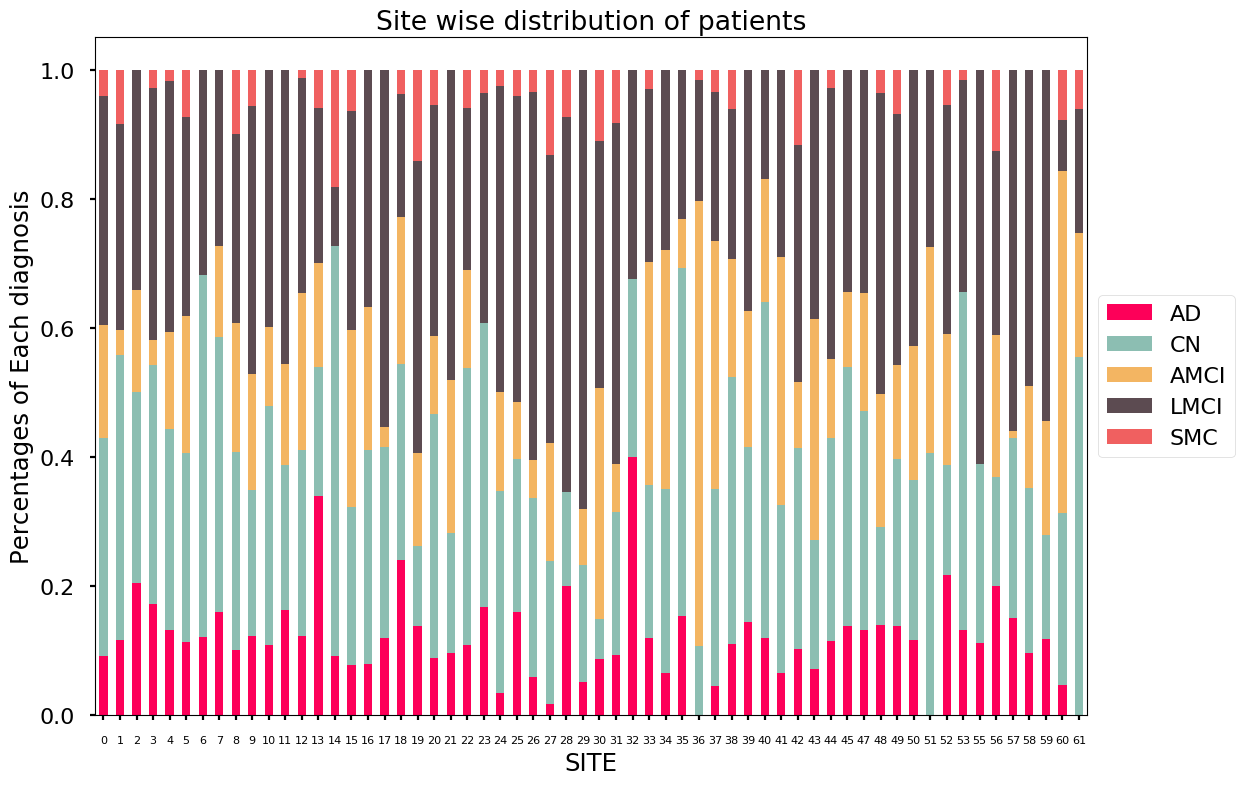

In [30]:
import seaborn as sns
# sns.choose_dark_palette()
sns.set_context('poster')

flatui = ["#FD0059", "#8CBEB2", "#F3B562", "#5C4B51", "#F06060" ]
sns.palplot(sns.color_palette(flatui))
sns.set_palette(flatui)

c=c.rename(index=str, columns={0: "AD", 1: "CN", 2:"AMCI", 3:"LMCI", 4:"SMC"})
c.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(fontsize=8, rotation=0)
plt.xlabel('SITE')
plt.ylabel('Percentages of Each diagnosis')
plt.title('Site wise distribution of patients')
plt.savefig('Figs/Site_vs_Score')

In [18]:
# import seaborn as sns
# sns.set_context('poster')


# c.plot(kind='hist')
w = 0.8
c[0].plot(kind='bar', position=0, width=w, label='AD')
c[1].plot(kind='bar', color='r', position=0, width=w, label='CN')
# c[2].plot(kind='bar', color='y', position=0, width=w, label='EMCI')
# c[3].plot(kind='bar', color='g', position=0, width=w, label='LMCI')
# c[4].plot(kind='bar', color='b', position=0, width=w, label='SMC')

# df['change2'].plot(kind='bar', color='blue', ax=ax2, position=1, width=0.25) , color='red', ax=ax,
plt.xlabel('SITE')
plt.ylabel('Percetage of diagnosis')
plt.xticks(fontsize=8, rotation=0)
plt.legend()
plt.show()

KeyError: 0

In [23]:
c

,0,1,2,3,4
0,0.092166,0.336406,0.175115,0.354839,0.041475
1,0.116883,0.441558,0.038961,0.318182,0.084416
2,0.204545,0.295455,0.159091,0.340909,0.000000
3,0.171429,0.371429,0.038095,0.390476,0.028571
4,0.131737,0.311377,0.149701,0.389222,0.017964
5,0.113821,0.292683,0.211382,0.308943,0.073171
6,0.121212,0.560606,0.000000,0.318182,0.000000
7,0.159091,0.426136,0.142045,0.272727,0.000000
8,0.100000,0.307143,0.200000,0.292857,0.100000
9,0.122642,0.226415,0.179245,0.415094,0.056604


     0
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
10  10
11  11
12  12
13  13
14  14
15  15
16  16
17  17
18  18
19  19
20  20
21  21
22  22
23  23
24  24
25  25
26  26
27  27
28  28
29  29
..  ..
32  32
33  33
34  34
35  35
36  36
37  37
38  38
39  39
40  40
41  41
42  42
43  43
44  44
45  45
46  46
47  47
48  48
49  49
50  50
51  51
52  52
53  53
54  54
55  55
56  56
57  57
58  58
59  59
60  60
61  61

[62 rows x 1 columns]
(62, 5) (62, 1)


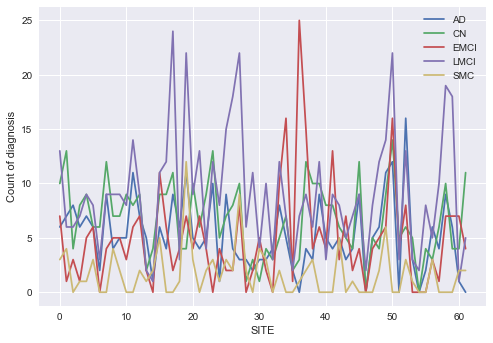

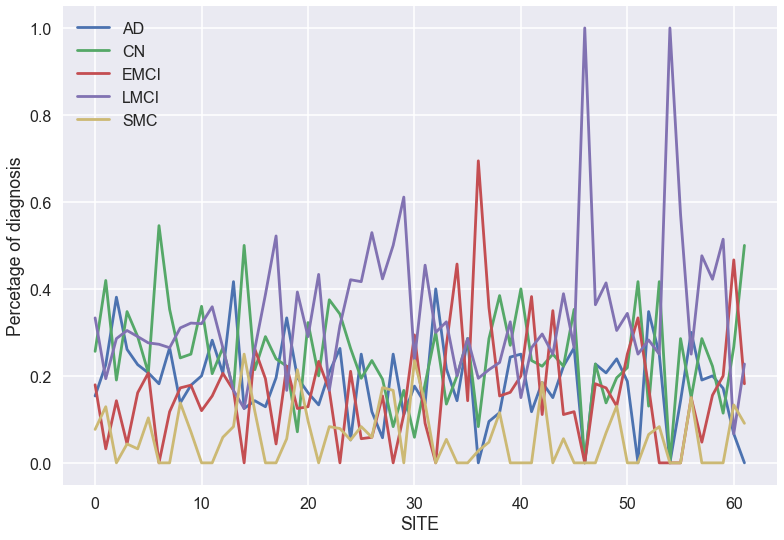

In [100]:
# Without longitudinal data
df = pd.get_dummies(no_long[['DX_bl']])
df['SITE'] = no_long['SITE']

# plt.scatter(df['DX'])
df2 = df.groupby(by=['SITE']).agg(['sum'])
x = encode.fit_transform(no_long['SITE'].unique())
x.sort()
x = pd.DataFrame(x)

# Generating percentages
b = pd.DataFrame(df2.get_values())
s = b.sum(axis=1)

# df = df[df.sum(axis=1)>5]
print(b.shape, x.shape)

c=pd.DataFrame()
for col in b.columns:
    c[col] = b[col]/s

c.head()
# sns.set_context('notebook')
plt.plot(x, df2['DX_bl_AD'], label='AD')
plt.plot(x, df2['DX_bl_CN'], label='CN')
plt.plot(x, df2['DX_bl_EMCI'], label='EMCI')
plt.plot(x, df2['DX_bl_LMCI'], label='LMCI')
plt.plot(x, df2['DX_bl_SMC'], label='SMC')
plt.legend()
plt.xlabel('SITE')
plt.ylabel('Count of diagnosis')
plt.show()



# sns.set_context('poster')

plt.plot(x, c[0], label='AD')
plt.plot(x, c[1], label='CN')
plt.plot(x, c[2], label='EMCI')
plt.plot(x, c[3], label='LMCI')
plt.plot(x, c[4], label='SMC')
plt.legend()
plt.xlabel('SITE')
plt.ylabel('Percetage of diagnosis')
plt.show()


# plt.scatter(encode.fit_transform(by_RID['SITE']),encode.fit_transform(by_RID['DX_bl']))
# plt.xlabel('SITE')
# plt.ylabel('DX_bl')

In [99]:
x


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [18]:
# Chance of forgetting is more for less education score
by_RID[['PTEDUCAT', 'RAVLT_perc_forgetting']].groupby(by='PTEDUCAT').agg(['mean','count'])

RAVLT_perc_forgetting      
                          mean count
PTEDUCAT                            
4                    90.000000     2
6                    64.353595    19
7                    69.161000    21
8                    64.231687    48
9                    65.175437    19
10                   48.903992    60
11                   84.675541    34
12                   70.173808   619
13                   60.349263   298
14                   59.654736   594
15                   50.000218   190
16                   59.696396  1205
17                   54.110103   232
18                   56.498486  1002
19                   51.808493   229
20                   49.172189   695

In [25]:
# Can marriage here be correlated to forgetting? Number of years married?
# display(by_RID[['PTMARRY', 'RAVLT_perc_forgetting']].groupby(by='PTMARRY').agg(['mean','count']))
# display(by_RID[['PTMARRY', 'FAQ']].groupby(by='PTMARRY').agg(['mean','count']))
# display(by_RID[['PTMARRY', 'MMSE']].groupby(by='PTMARRY').agg(['mean','count']))

display(by_RID[['PTMARRY', 'RAVLT_perc_forgetting', 'FAQ', 'MMSE']].groupby(by='PTMARRY').agg(['mean','count']))

RAVLT_perc_forgetting             FAQ             MMSE      
                               mean count      mean count       mean count
PTMARRY                                                                   
Divorced                  48.757366   678  2.631268   678  27.688791   678
Married                   61.260103  6527  5.486288  6527  26.667382  6527
Never married             48.389432   263  2.570342   263  28.095057   263
Unknown                   43.167276    33  1.696970    33  28.575758    33
Widowed                   60.619302  1004  4.673307  1004  26.873506  1004

314
314


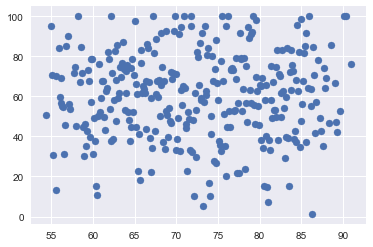

In [36]:
df = by_RID[['AGE', 'RAVLT_perc_forgetting']].groupby(by='AGE').agg('mean').copy()
# display(df)
print(len(by_RID['AGE'].unique()))
print(len(df.get_values()))
plt.scatter(by_RID['AGE'].unique(), df.get_values())

In [20]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
sub = by_RID[['MMSE', 'RAVLT_perc_forgetting_bl', 'FAQ', 'DX_bl']].copy()
sub['DX_bl'] = encode.fit_transform(sub['DX_bl'])
print(sub.shape)
sub.head()

tree = DecisionTreeClassifier().fit(sub[['MMSE', 'RAVLT_perc_forgetting_bl', 'FAQ']], sub['DX_bl'])
tree.tree_.max_depth

(5267, 4)


21

In [21]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
import io

graph = export_graphviz(tree, out_file=None) 
pydot_graph = pydotplus.graph_from_dot_data(graph) 
Image(pydot_graph.create_png())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [ ]:
# pd.get_dummies(by_RID[['DX_bl', 'PTETHCAT']]).plot(kind='hist')
# plt.scatter(no_long['AGE'], no_long['RAVLT_learning_bl'])
no_long[['AGE','RAVLT_perc_forgetting_bl']].groupby(by='AGE').agg(['mean', 'count'])

/Users/mehulsmritiraje/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mehulsmritiraje/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


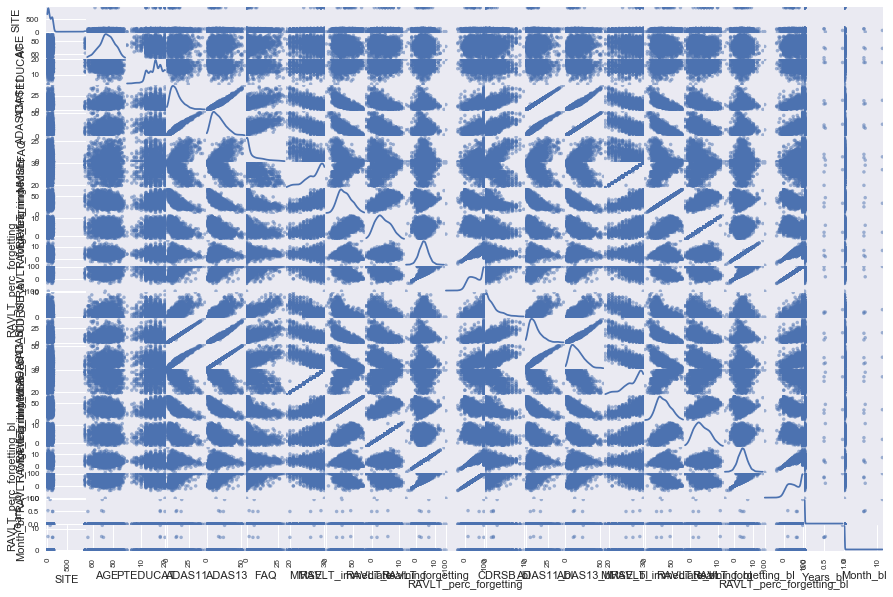

In [44]:
from pandas.tools.plotting import scatter_matrix
fig, ax = plt.subplots(1,1, figsize=(15,10))
axes = scatter_matrix(no_long, alpha=0.5, diagonal='kde', ax=ax)
plt.show()